In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
plt.rc('axes', unicode_minus=False)
plt.rc('font', family='Malgun Gothic')
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

In [4]:
df = pd.read_csv("./data/상가(상권)정보_의료기관_201909.csv", low_memory=False)

In [5]:
df_nowon = df[df["시군구명"] == "노원구"].copy()
# df_nowon.head(1)

In [6]:
df_medical = df_nowon[df_nowon["상권업종중분류명"] == "병원"]
# df_medical.head(1)

In [7]:
df_medical["상권업종소분류명"].value_counts()

# 노인과 관련없는 소아과, 산부인과, 피부과 제외
df_medical = df_medical[df_medical["상권업종소분류명"] != "소아과"]
df_medical = df_medical[df_medical["상권업종소분류명"] != "산부인과"]
df_medical = df_medical[df_medical["상권업종소분류명"] != "피부과"]

# 추가적인 전처리를 위해 정형/성형외과, 기타병원 제외
df_medical = df_medical[df_medical["상권업종소분류명"] != "정형/성형외과"]
df_medical = df_medical[df_medical["상권업종소분류명"] != "기타병원"]

# df_medical["상권업종소분류명"].value_counts()
df_medical["행정동명"].value_counts()

상계6.7동    80
공릉1동      32
중계2.3동    32
상계2동      29
월계1동      23
월계3동      23
상계1동      23
중계4동      20
중계본동      17
상계8동      17
공릉2동      15
중계1동      13
상계9동      13
하계1동      13
월계2동      12
상계3.4동    11
하계2동      10
상계5동       7
상계10동      5
Name: 행정동명, dtype: int64

In [8]:
df_some = df_nowon[df_nowon["상권업종중분류명"] == "병원"]

df_beauty = df_some[df_some["상권업종소분류명"] == "정형/성형외과"]
df_etc = df_some[df_some["상권업종소분류명"] == "기타병원"]

In [9]:
# 성형외과 제거
df_beauty["상호명"].value_counts()
beauty = df_beauty.drop(df_beauty.index[[0, 7, 8, 9, 13, 14]])
beauty["행정동명"].value_counts()
# beauty["상호명"].value_counts()

중계본동      2
상계6.7동    2
중계1동      2
공릉1동      1
상계2동      1
상계1동      1
중계2.3동    1
중계4동      1
Name: 행정동명, dtype: int64

In [10]:
# 기타병원 중 정신과, 미용치료 병원, 아동 병원 제외
df_etc["상호명"].value_counts()
etc = df_etc.drop(df_etc.index[[3, 4, 9, 11, 15, 16, 18, 21, 31, 38, 40, 41, 44]])
etc["행정동명"].value_counts()

# etc["상호명"].value_counts()

상계6.7동    8
상계8동      4
공릉1동      3
중계2.3동    3
상계3.4동    3
월계2동      2
상계5동      2
상계2동      2
중계본동      2
월계3동      1
월계1동      1
중계1동      1
Name: 행정동명, dtype: int64

In [11]:
df_medical = pd.concat([beauty, df_medical])
df_medical = pd.concat([etc, df_medical])
df_medical.drop_duplicates(["위도", "경도"])
df_medical["행정동명"].value_counts()

상계6.7동    90
중계2.3동    36
공릉1동      36
상계2동      32
상계1동      24
월계1동      24
월계3동      24
중계본동      21
상계8동      21
중계4동      21
중계1동      16
공릉2동      15
상계3.4동    14
월계2동      14
하계1동      13
상계9동      13
하계2동      10
상계5동       9
상계10동      5
Name: 행정동명, dtype: int64

In [12]:
# df_medical.columns
df_medical = df_medical.drop(['상가업소번호', '지점명', '상권업종대분류코드','상권업종중분류코드', '상권업종소분류코드', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보'], axis=1)

In [13]:
df_medical = df_medical.drop(51409)
df_medical

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,행정동명,경도,위도
2472,태능마이크로병원1층,의료,병원,기타병원,공릉1동,127.074950,37.618197
2740,신원진단검사의학과의원,의료,병원,기타병원,상계6.7동,127.062595,37.646797
3065,실로암의원,의료,병원,기타병원,월계2동,127.056199,37.629302
14181,조가정의원,의료,병원,기타병원,월계3동,127.065202,37.626815
14739,노원진단검사과,의료,병원,기타병원,상계6.7동,127.062595,37.646797
...,...,...,...,...,...,...,...
90070,세이유외과,의료,병원,내과/외과,상계6.7동,127.060002,37.654760
90803,경희평온,의료,병원,한의원,상계8동,127.056221,37.666939
90974,서울열린치과의원,의료,병원,치과의원,상계6.7동,127.061460,37.652366
91030,마들수내과의원,의료,병원,내과/외과,상계9동,127.065822,37.664204


In [14]:
p = df_medical[df_medical["행정동명"] == "하계2동"]
p

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,행정동명,경도,위도
9374,경귀준치과,의료,병원,치과의원,하계2동,127.065646,37.636604
30988,국군춘천병원치과진료,의료,병원,치과의원,하계2동,127.065646,37.636604
35418,자양한의원,의료,병원,한의원,하계2동,127.065646,37.636604
48023,서태헌안과,의료,병원,안과의원,하계2동,127.065679,37.634919
74783,이지성이비인후과,의료,병원,이비인후과의원,하계2동,127.064525,37.636613
84887,삼성한의원,의료,병원,한의원,하계2동,127.067254,37.633986
87020,한치과의원,의료,병원,치과의원,하계2동,127.065646,37.636604
88369,장생한의원,의료,병원,한의원,하계2동,127.059783,37.637945
89004,필치과,의료,병원,치과의원,하계2동,127.059783,37.637945


In [15]:
df_medical["행정동명"].value_counts()

상계6.7동    90
중계2.3동    36
공릉1동      36
상계2동      32
상계1동      24
월계1동      24
월계3동      24
중계본동      21
상계8동      21
중계4동      21
중계1동      16
공릉2동      15
상계3.4동    14
월계2동      14
하계1동      13
상계9동      13
상계5동       9
하계2동       9
상계10동      5
Name: 행정동명, dtype: int64

In [16]:
df_medical.to_csv("hospital.csv")

<AxesSubplot:xlabel='count', ylabel='행정동명'>

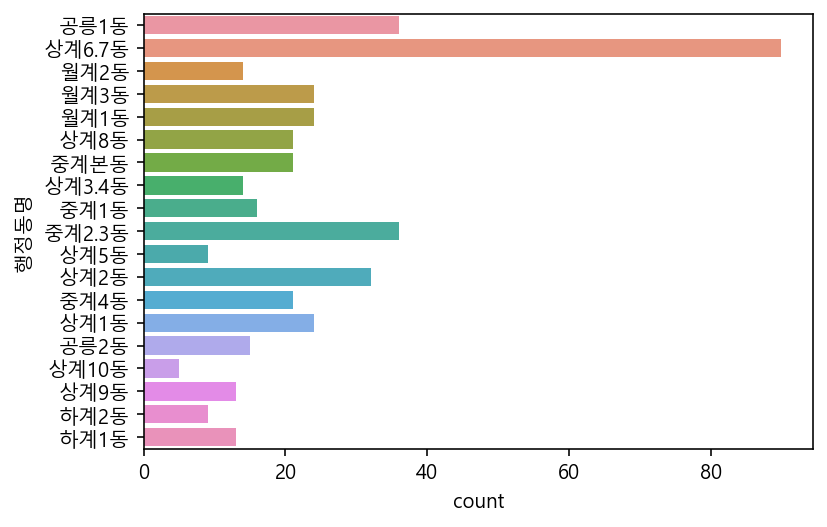

In [17]:
sns.countplot(data=df_medical, y="행정동명")

In [18]:
# 최종
df = pd.read_csv("./data/hospital_ana.csv", low_memory=False)
df.set_index("행정동", inplace=True)
df

,병원
행정동,
상계6.7동,90
중계2.3동,36
공릉1동,36
상계2동,32
상계1동,24
월계3동,24
월계1동,24
중계4동,21
상계8동,21


<AxesSubplot:ylabel='행정동'>

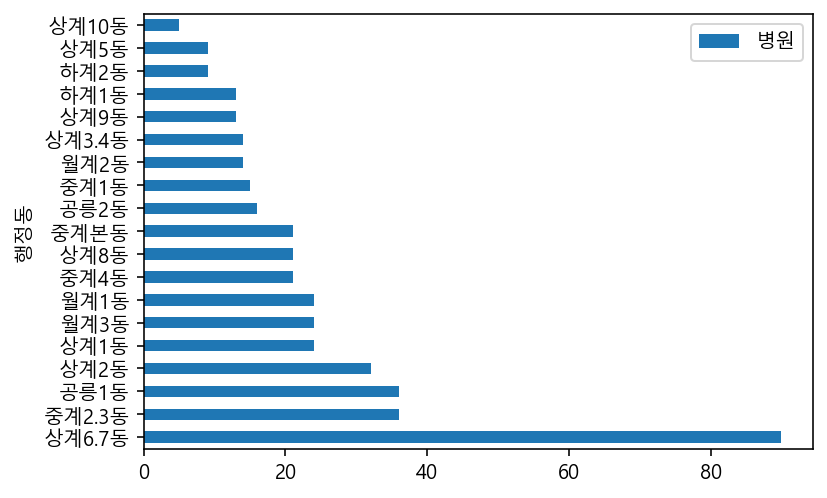

In [19]:
# 시각화
df.plot.barh()